# Chest X-Ray Classification with CNN (Pneumonia Detection)

This project demonstrates how a **Convolutional Neural Network (CNN)** using **TensorFlow** can be applied to a healthcare-related task — classifying chest X-ray images as **Pneumonia** or **Normal**.

---

## Dataset

The dataset used is [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia), which includes:

- Chest X-ray images divided into `train`, `val`, and `test` folders.
- Each folder contains images under two labels: `NORMAL` and `PNEUMONIA`.

---

## Steps Overview

1. Import Dependencies  
2. Load and Preprocess the Data  
3. Visualize Sample Images  
4. Build the CNN Model  
5. Train the Model  
6. Evaluate Performance  
7. Visualize Results

## Importing dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


## Load and Preprocess the Data

We’ll use `ImageDataGenerator` to:

- Rescale the pixel values to [0, 1]
- Organize images from directories
- Perform basic augmentation on training data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths
base_dir = "/content/drive/MyDrive/NAAMII/Machine Learning Framework and Tools/chest_xray"  # Update this path as needed

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=16,
                                                    class_mode='binary')

val_generator = val_test_datagen.flow_from_directory(val_dir,
                                                     target_size=(150, 150),
                                                     batch_size=16,
                                                     class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                      target_size=(150, 150),
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Visualize Sample Images

Before training, it's helpful to inspect a few sample images from the dataset. This helps verify:

- Correct loading of the dataset
- Class distribution and clarity of images
- Whether preprocessing steps (like rescaling or augmentation) are working as intended


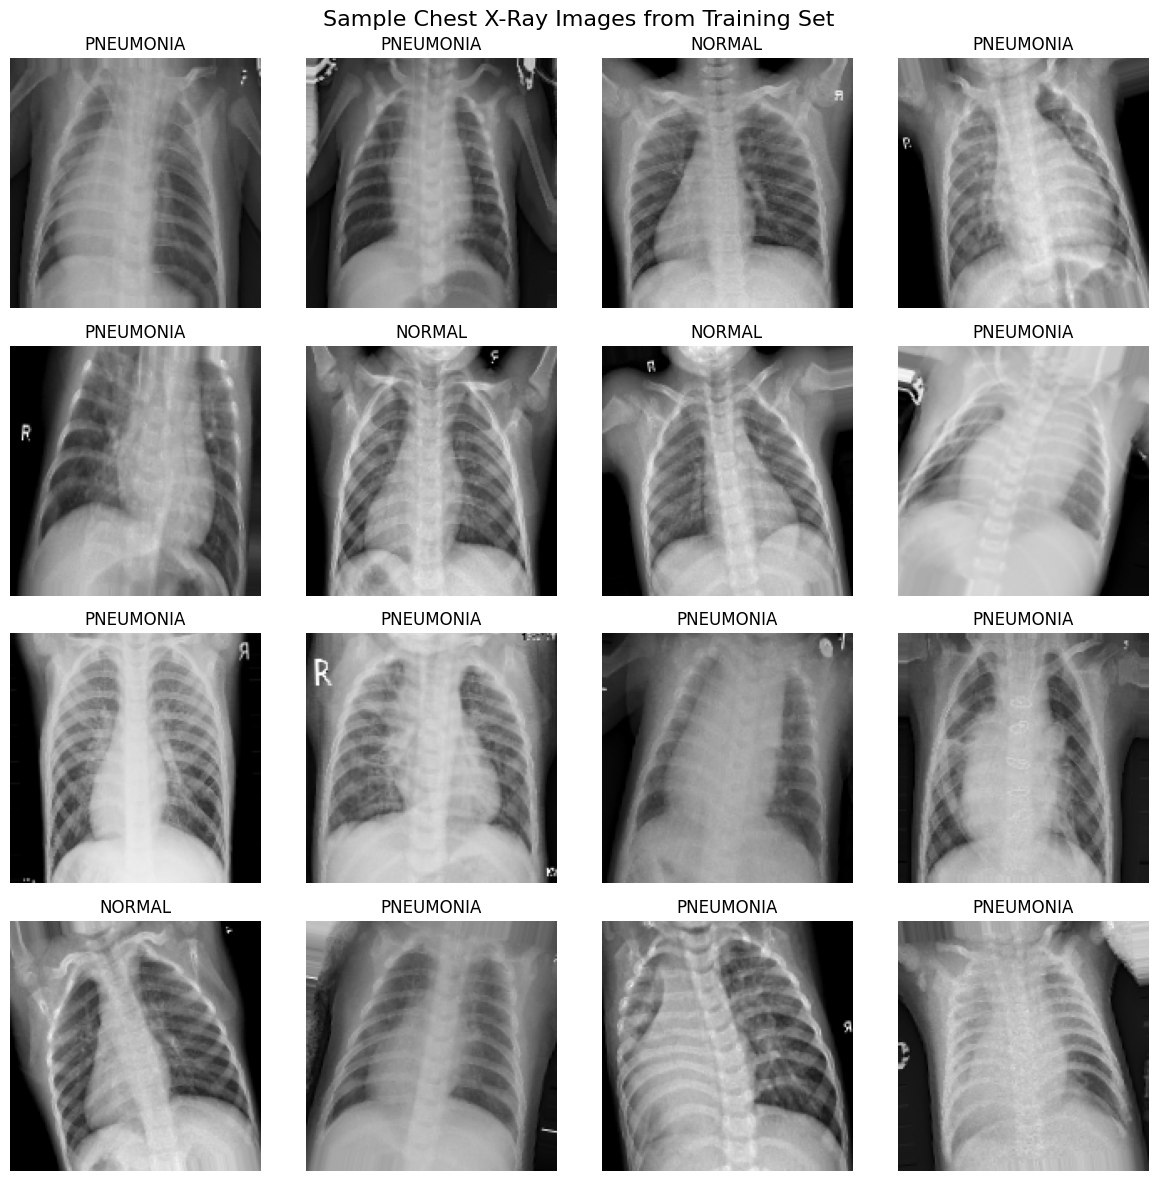

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Plot the first 16 images in a 4x4 grid
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    label = "PNEUMONIA" if labels[i] == 1 else "NORMAL"
    plt.title(label)
    plt.axis('off')
plt.suptitle("Sample Chest X-Ray Images from Training Set", fontsize=16)
plt.tight_layout()
plt.show()

## Building a Convolutional Neural Network (CNN) for Chest X-Ray Classification
In this section, we define a CNN model using TensorFlow/Keras to classify chest X-ray images into two categories: NORMAL and PNEUMONIA. The model consists of multiple convolutional and pooling layers to extract hierarchical features from the input images, followed by dense layers for classification.

Key components of the model:

- Conv2D layers: To extract spatial features from the X-ray
images.

- MaxPooling2D layers: To reduce dimensionality and retain the most salient features.

- Dropout: To prevent overfitting by randomly deactivating neurons during training.

- Dense layers: For the final binary classification using sigmoid activation.

We use binary_crossentropy as the loss function because this is a binary classification problem.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], images.shape[3])),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN Model
In this step, we train the CNN model using the training dataset and validate its performance on the validation set.

Key points:

- train_generator and val_generator are data generators that yield batches of training and validation images respectively.

- steps_per_epoch: The number of batches per epoch (typically set to len(train_generator)).

- epochs: Total number of training cycles through the full dataset.

- validation_data and validation_steps are used to evaluate the model's performance on unseen data after each epoch.

In [ ]:
# # Train the CNN model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs= 5,
#     validation_data=val_generator,
#     validation_steps=len(val_generator)
# )

## Full Pipeline: Training, Evaluation, and Confusion Matrix
This cell performs a complete training pipeline:

- Trains the model on chest X-ray data

- Visualizes training and validation performance

- Evaluates accuracy and loss on the validation set

- Plots a confusion matrix to assess how well the model distinguishes between NORMAL and PNEUMONIA

- Saves the trained model for future use

The confusion matrix provides deeper insight into the model’s performance:

- High values on the diagonal indicate correct predictions

- Off-diagonal values reveal misclassifications

This combined workflow ensures minimal disruption due to runtime resets in Colab.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 1854s 6s/step - accuracy: 0.7591 - loss: 0.4964 - val_accuracy: 0.7500 - val_loss: 0.7765
Epoch 2/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 117s 268ms/step - accuracy: 0.9098 - loss: 0.2258 - val_accuracy: 0.7500 - val_loss: 0.6664
Epoch 3/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 86s 263ms/step - accuracy: 0.9270 - loss: 0.1973 - val_accuracy: 0.6875 - val_loss: 0.7645
Epoch 4/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 89s 274ms/step - accuracy: 0.9364 - loss: 0.1679 - val_accuracy: 0.7500 - val_loss: 0.7131
Epoch 5/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 140s 269ms/step - accuracy: 0.9460 - loss: 0.1606 - val_accuracy: 0.8125 - val_loss: 0.5425


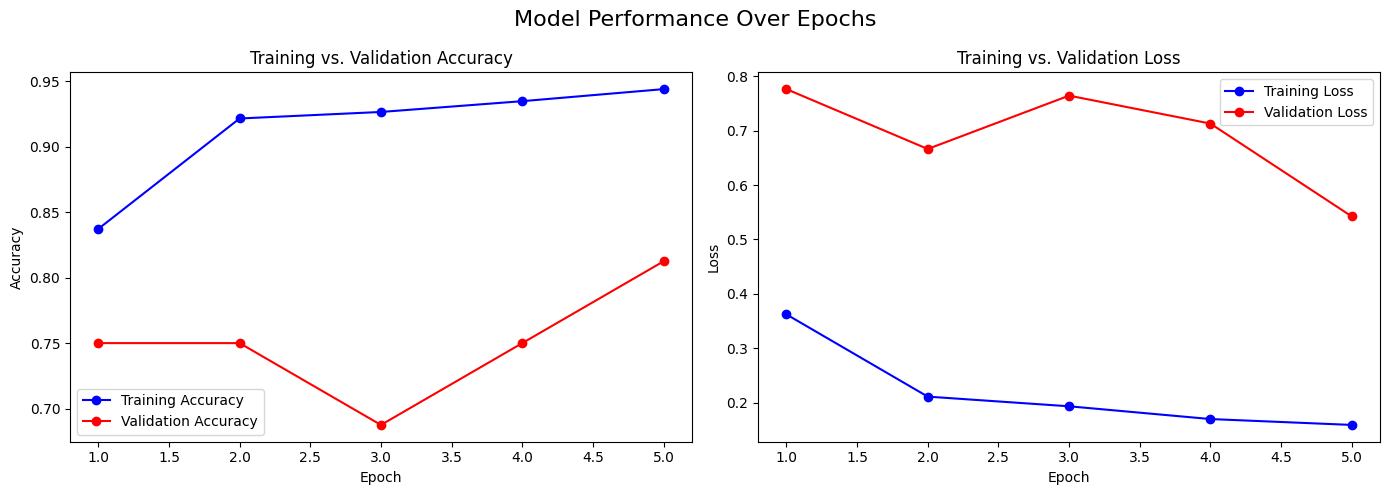

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.8125 - loss: 0.5425
Validation Accuracy: 81.25%
Validation Loss: 0.5425
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


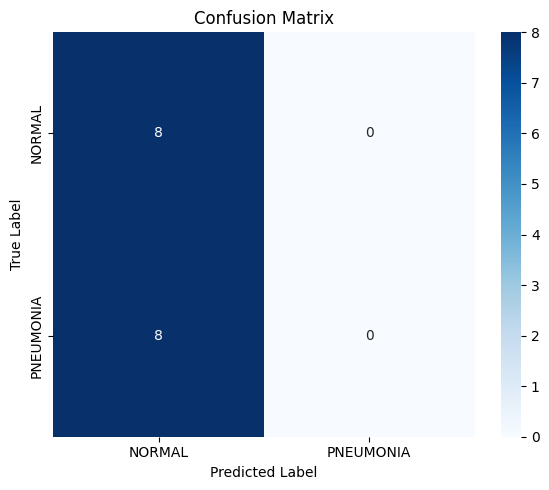

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Step 2: Plot training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Model Performance Over Epochs', fontsize=16)
plt.tight_layout()
plt.show()

# Step 3: Evaluate model on validation set
val_loss, val_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

# Step 4: Confusion Matrix
# Get predictions and true labels
val_generator.reset()
pred_probs = model.predict(val_generator, steps=len(val_generator), verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_generator.class_indices.keys())

# Step 5: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Step 6: Save the model
model.save('chest_xray_cnn_model.h5')

## Model Evaluation and Discussion

The model achieved a final validation accuracy of 81.25%, which may initially seem promising. However, upon analyzing the confusion matrix, it was observed that while all 'NORMAL' class images were correctly classified, all 'PNEUMONIA' class images were misclassified as 'NORMAL', resulting in a significant performance gap for one of the two classes.

Since the validation set contains an equal number of samples from both classes (8 each), this result cannot be attributed to class imbalance. Instead, the misclassifications may stem from other factors such as:

- Overfitting: The model may have learned features specific to the training data and failed to generalize well to unseen pneumonia cases.

- Feature similarity: The 'PNEUMONIA' images might have presented subtle features not distinguishable enough by the current model architecture or preprocessing pipeline.

- Limited validation data: With only 16 samples in the validation set, even one or two misclassifications can disproportionately affect performance metrics and reduce confidence in generalization.

### Mitigation Strategies:
To improve future performance and address this issue:

- Augment the dataset further with transformations (like zoom, rotation, brightness adjustments) to improve generalization.

- Use a deeper model architecture (like ResNet or DenseNet) pre-trained on ImageNet or medical datasets.

- Increase validation/test set size to obtain more reliable performance estimates.

- Use evaluation metrics like F1-score, precision, and recall, especially in class-imbalanced or clinically critical settings where accuracy alone is misleading.


This evaluation highlights the importance of not relying solely on accuracy and encourages a more nuanced interpretation of model performance, especially in sensitive domains like medical imaging.